In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [2]:
def dx(x, y):
    return 2*x-y

def dy(x, y):
    return x+2*y

In [3]:
def System(y, t):
    q, p = y
    dqdt = dx(q, p)
    dpdt = dy(q, p)
    return [dqdt, dpdt]


In [4]:
q0 = 1
p0 = 1
i0 = [q0, p0]

In [5]:
t = np.linspace(0, 10, 100)

In [6]:
def jacobian_matrix():
    return np.array([[2, -1], [1, 2]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(jacobian_matrix())

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [2.+1.j 2.-1.j]
Eigenvectors: [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [7]:
solution = odeint(System, i0, t)

q_solution = solution[:, 0]
p_solution = solution[:, 1]

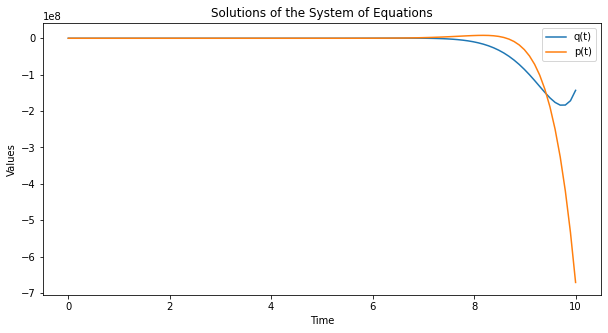

In [8]:
fig=plt.figure(figsize=(10, 5))
plt.plot(t, q_solution, label='q(t)')
plt.plot(t, p_solution, label='p(t)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Solutions of the System of Equations')
plt.legend()
plt.show()

In [9]:
initial_guess = [1, 1]
critical_point = fsolve(System, initial_guess,t)

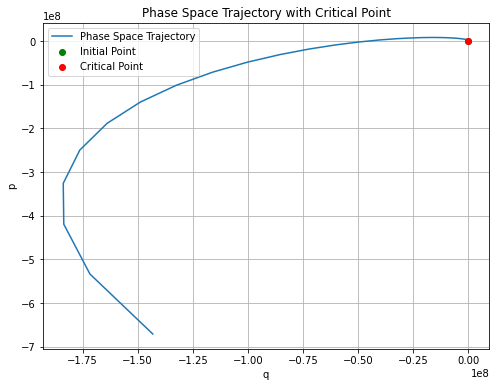

In [10]:
fig = plt.figure(figsize=(8, 6))
plt.plot(q_solution, p_solution, label='Phase Space Trajectory')
plt.scatter(q_solution[0], p_solution[0], color='green', label='Initial Point')
plt.scatter(critical_point[0], critical_point[1], color='red', label='Critical Point', zorder=5)
plt.xlabel('q')
plt.ylabel('p')
plt.title('Phase Space Trajectory with Critical Point')
plt.legend()
plt.grid(True)
plt.show()